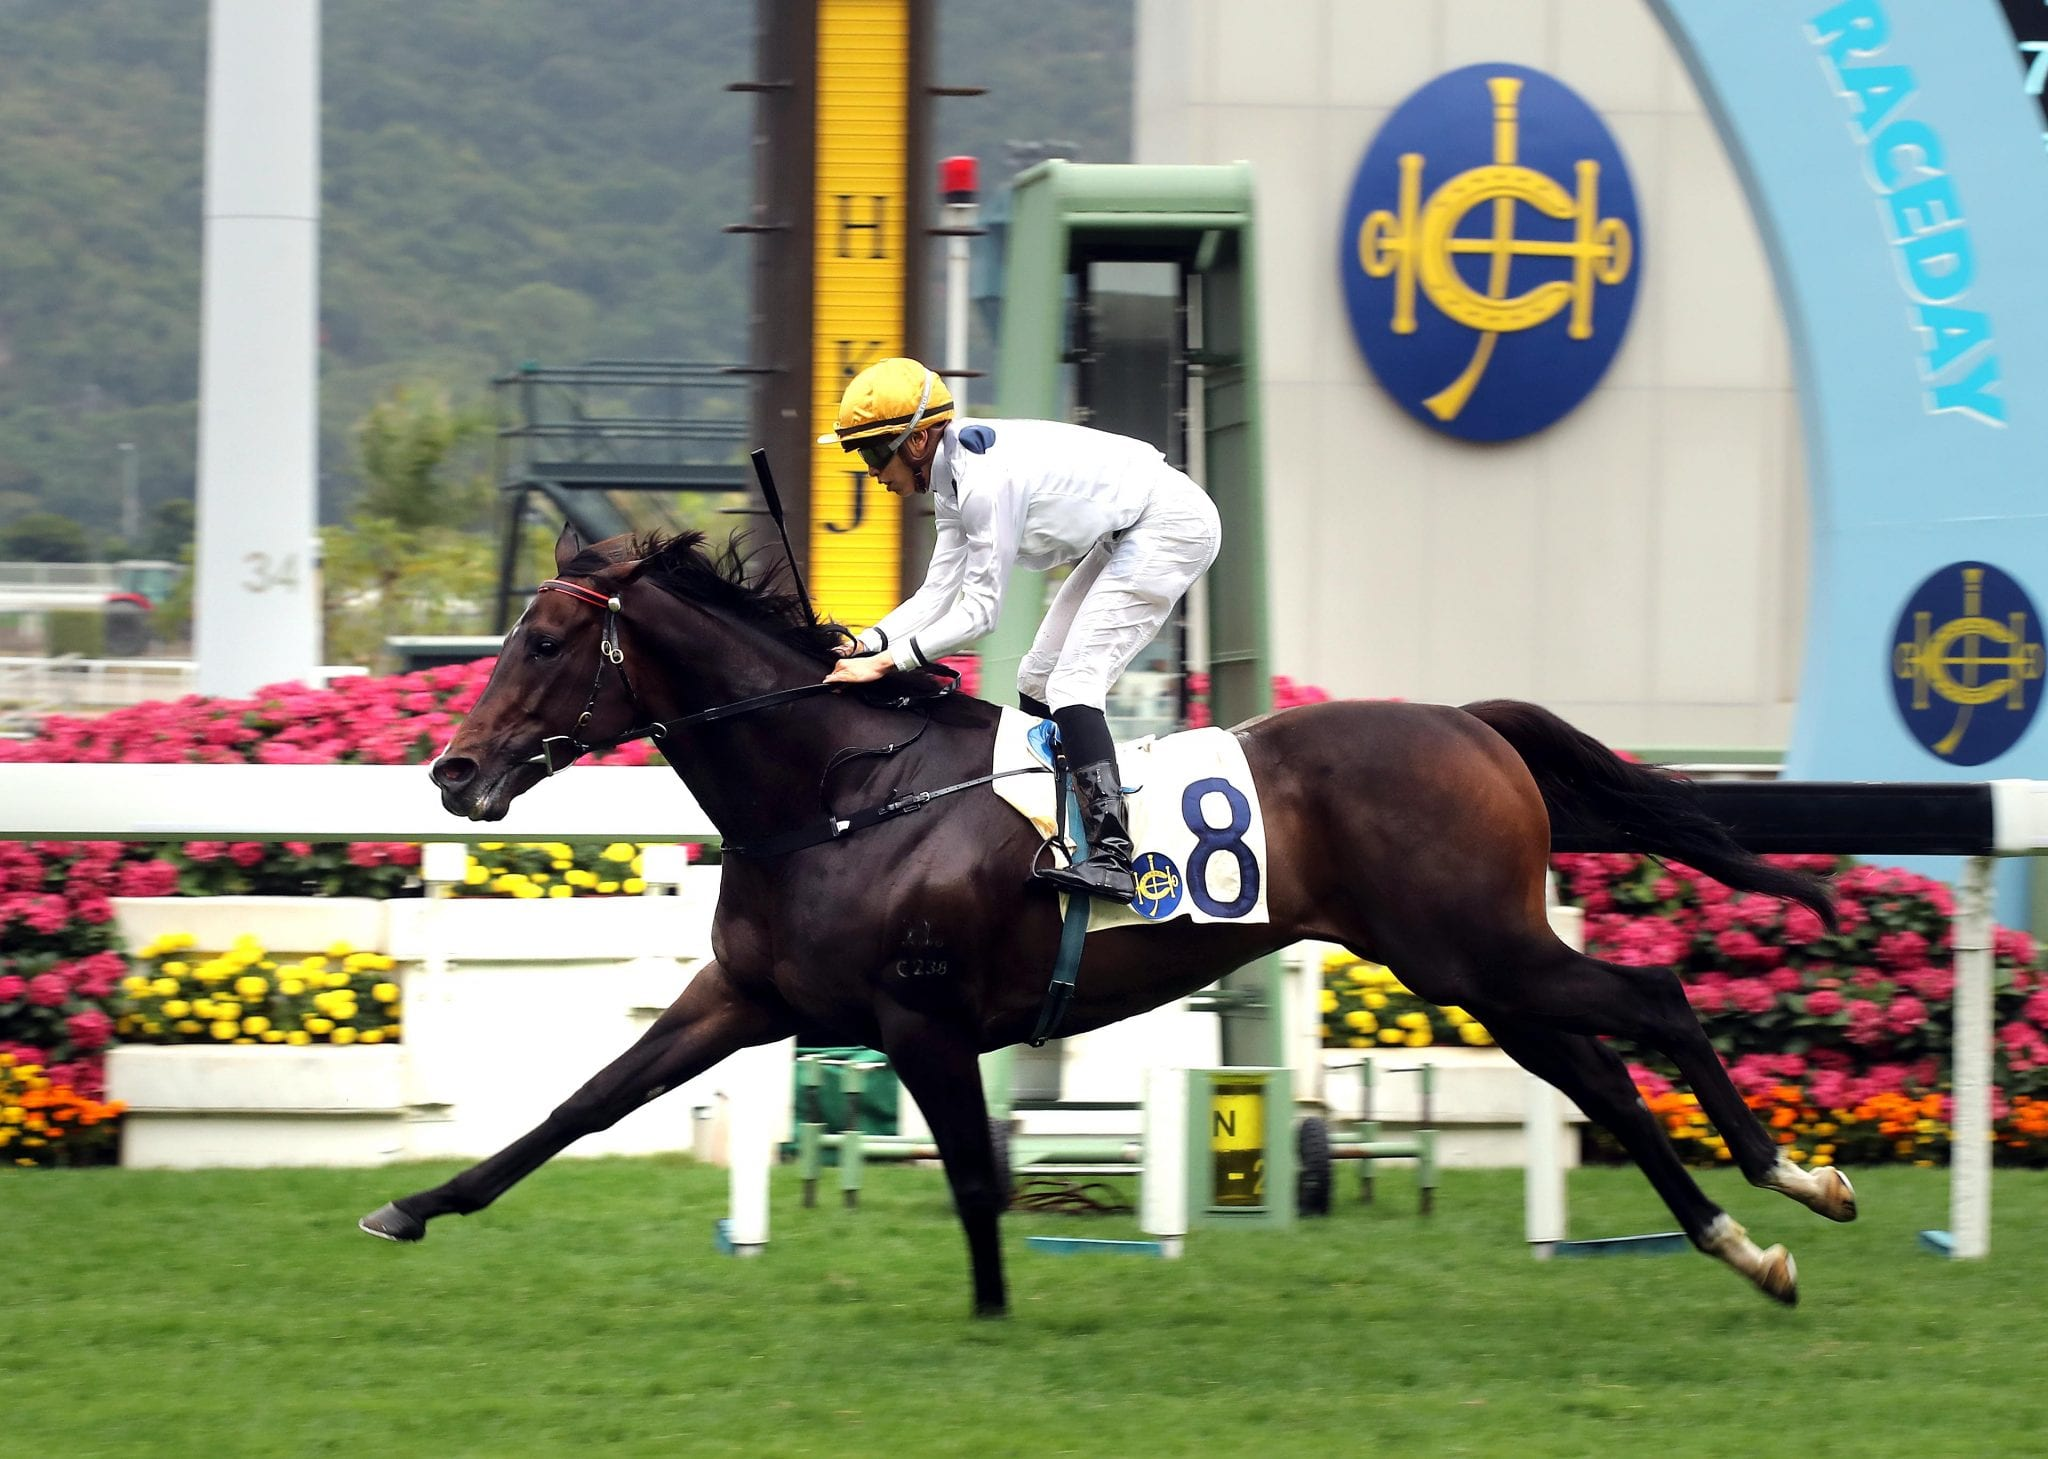

In [1]:
from IPython.display import Image
Image("Imagenes/25.jpg")

In [2]:
(Imagenes\25.jpg)

SyntaxError: unexpected character after line continuation character (<ipython-input-2-a40273a6afa7>, line 1)

In [3]:
#Martin Work

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# More data cleaning 

In [69]:
raceruns=pd.read_csv("final.csv")
raceruns.head()

,Unnamed: 0,race_id_x,venue,race_no,distance,going,horse_ratings,prize,date,horse_no,...,trainer,actual_weight_y,declared_horse_weight,draw,race year,race_idnew,result_y,actual_weightnew,horse_numbernew,race_datenew
0,0,4547,ST,1,1400,GOOD TO FIRM,40-15,575000.0,2003-06-01,1,...,D Cruz,133,1032,1,2014,1,1,133,1,2014-09-14
1,1,4547,ST,1,1400,GOOD TO FIRM,40-15,575000.0,2003-06-01,2,...,D E Ferraris,133,1075,13,2014,1,2,133,2,2014-09-14
2,2,4547,ST,1,1400,GOOD TO FIRM,40-15,575000.0,2003-06-01,3,...,C S Shum,132,1222,2,2014,1,4,132,3,2014-09-14
3,3,4547,ST,1,1400,GOOD TO FIRM,40-15,575000.0,2003-06-01,4,...,L Ho,129,1203,8,2014,1,8,129,4,2014-09-14
4,4,4547,ST,1,1400,GOOD TO FIRM,40-15,575000.0,2003-06-01,5,...,P O'Sullivan,125,1099,4,2014,1,11,125,5,2014-09-14


In [70]:
raceruns.columns

Index(['Unnamed: 0', 'race_id_x', 'venue', 'race_no', 'distance', 'going',
       'horse_ratings', 'prize', 'date', 'horse_no', 'horse_id_x', 'result_x',
       'won', 'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'declared_weight', 'actual_weight_x', 'finish_time', 'win_odds',
       'datenew', 'src', 'race_date', 'race_course', 'race_number',
       'race_id_y', 'race_class', 'race_distance', 'track_condition',
       'race_name', 'track', 'finishing_position', 'horse_number',
       'horse_name', 'horse_id_y', 'jockey', 'trainer', 'actual_weight_y',
       'declared_horse_weight', 'draw', 'race year', 'race_idnew', 'result_y',
       'actual_weightnew', 'horse_numbernew', 'race_datenew'],
      dtype='object')

In [73]:
del raceruns["race_id_y"],raceruns["draw"],raceruns["actual_weight_y"],raceruns["horse_id_y"],raceruns["result_y"],raceruns["win_odds"],raceruns["src"],raceruns["race_date"],raceruns["venue"],raceruns["date"],raceruns["track_condition"],raceruns["finishing_position"],raceruns["horse_number"],raceruns["actual_weightnew"],raceruns["declared_weight"],raceruns["race year"],raceruns["horse_numbernew"],raceruns["race_datenew"],raceruns["Unnamed: 0"],raceruns["race_number"],raceruns["race_idnew"],raceruns["race_distance"]

In [74]:
raceruns.columns

Index(['race_id_x', 'race_no', 'distance', 'going', 'horse_ratings', 'prize',
       'horse_no', 'horse_id_x', 'result_x', 'won', 'horse_age',
       'horse_country', 'horse_type', 'horse_rating', 'actual_weight_x',
       'finish_time', 'datenew', 'race_course', 'race_class', 'race_name',
       'track', 'horse_name', 'jockey', 'trainer', 'declared_horse_weight'],
      dtype='object')

In [75]:
raceruns=raceruns.rename(columns={"race_id_x":"Race_id",
                                  "race_no":"Race_no",
                                 "distance":"Distance",
                                 "going":"Surface_condition",
                                 "prize":"Prize",
                                 "horse_no":"Horse_no",
                                 "horse_id_x":"Horse_id",
                                 "result_x":"Final_position",
                                 "won":"Won",
                                 "horse_age":"Horse_age",
                                 "horse_country":"Horse_country",
                                 "horse_type":"Horse_type",
                                 "actual_weight_x":"Actual_weight",
                                 "finish_time":"Finish_time",
                                 "datenew":"Date",
                                 "race_course":"Course",
                                 "race_class":"Class",
                                 
                                 "race_name":"Race_name",
                                 "track":"Track",
                                 "horse_name":"Horse_name",
                                 "jockey":"Jockey",
                                 "trainer":"Trainer",
                                 "declared_horse_weight":"Declared_weight",
                                 })
raceruns.to_csv('Finalmaslimpio.csv')

In [76]:
raceruns.columns

Index(['Race_id', 'Race_no', 'Distance', 'Surface_condition', 'horse_ratings',
       'Prize', 'Horse_no', 'Horse_id', 'Final_position', 'Won', 'Horse_age',
       'Horse_country', 'Horse_type', 'horse_rating', 'Actual_weight',
       'Finish_time', 'Date', 'Course', 'Class', 'Race_name', 'Track',
       'Horse_name', 'Jockey', 'Trainer', 'Declared_weight'],
      dtype='object')

# Horse rating analysis 

In [108]:
rating=raceruns
bins=[0,40,60,80,150]
labels=["0-40","41-60","61-80","81-130"]
ratings=pd.DataFrame(pd.cut(rating["horse_rating"],bins=bins,labels=labels).value_counts())
#ratings['Rate of Won races']=round(rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Won':'mean'})*100,2)
ratings['Declared weight mean (lb)']=round(rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Declared_weight':'mean'}),2)
ratings['Actual weight mode (lb)']=[129,125,120,126]
ratings['Prize $']=rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Prize':'mean'})
ratings['Prize $']=ratings['Prize $'].apply(lambda x: '%.0f' % x)
ratings=ratings.sort_index()
ratings=ratings.rename(columns={"horse_rating":"Number of Horses"})
ratings

,Number of Horses,Declared weight mean (lb),Actual weight mode (lb),Prize $
0-40,2640,1091.21,126,606405
41-60,10116,1107.12,129,897403
61-80,6477,1111.82,125,1145580
81-130,3311,1122.49,120,3272810


## Without dropping duplicates

In [102]:
r40=raceruns.query("horse_rating<40")
r60=raceruns.query("horse_rating>40 and horse_rating<=60")
r80=raceruns.query("horse_rating>60 and horse_rating<=80")
r100=raceruns.query("horse_rating>80 and horse_rating<=100")

## Dropping duplicates

In [95]:
from scipy.stats import linregress

In [110]:
rr=raceruns.drop_duplicates("Horse_id")
r40=rr.query("horse_rating<40")
r60=rr.query("horse_rating>40 and horse_rating<=60")
r80=rr.query("horse_rating>60 and horse_rating<=80")
r100=rr.query("horse_rating>80 and horse_rating<=100")

In [111]:
cu=r40["Actual_weight"].mode()
se=r60["Actual_weight"].mode()
och=r80["Actual_weight"].mode()
cien=r100["Actual_weight"].mode()
mode=[cu,se,och,cien]

The r-squared is: 0.9724864657291215


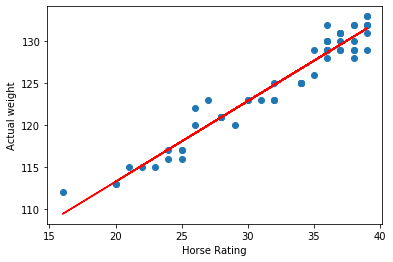

In [112]:
x_values = r40["horse_rating"]
y_values = r40["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.4816078178307201


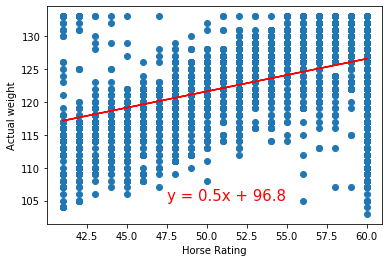

In [105]:
x_values = r60["horse_rating"]
y_values = r60["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47.5,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.8011284251735855


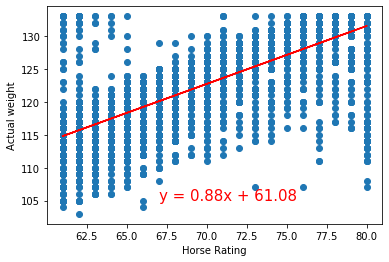

In [106]:
x_values = r80["horse_rating"]
y_values = r80["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(67,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.3271932766282157


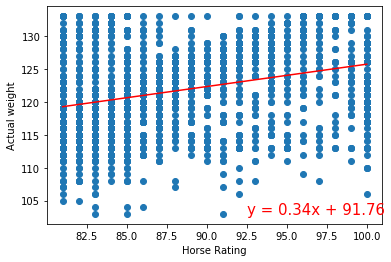

In [107]:
x_values = r100["horse_rating"]
y_values = r100["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(92.5,103),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()

# Country analysis

In [67]:
raceruns.columns

Index(['Race_id', 'Race_no', 'Distance', 'Surface_condition', 'horse_ratings',
       'Prize', 'Horse_no', 'Horse_id', 'Final_position', 'Won', 'Horse_age',
       'Horse_country', 'Horse_type', 'horse_rating', 'Actual_weight',
       'Finish_time', 'Date', 'Course', 'Class', 'Distance', 'Race_name',
       'Track', 'Horse_name', 'Jockey', 'Trainer', 'Declared_weight'],
      dtype='object')

In [79]:
pd.DataFrame(raceruns.groupby(["Course","Distance"])["Distance"].count())

Distance
Course       Distance          
Happy Valley 1000           948
             1200          3008
             1650          2569
             1800           818
             2200           242
Sha Tin      1000          1354
             1200          4476
             1400          4097
             1600          2208
             1650          1006
             1800          1163
             2000           519
             2200            61
             2400            75

In [117]:
ctry=round(pd.DataFrame(raceruns.groupby("Horse_country")["Won"].mean())*100,2)
ctry=ctry.rename(columns={"Won":"Win Rate","Horse_country":"Country"})
ctr=raceruns.drop_duplicates("Horse_id")
ctry["# of Horses"]=raceruns.groupby("Horse_country")["Horse_id"].count()
ctry=ctry.sort_values(by="Win Rate",ascending=False)
saf=raceruns.query("Horse_country=='SAF'")
safmode=saf["Actual_weight"].mode()
ctry

,Win Rate,# of Horses
Horse_country,,
SAF,9.01,222
AUS,8.58,8657
JPN,8.47,59
NZ,8.32,6872
USA,7.73,686
GB,7.59,2054
IRE,6.87,3190
ARG,5.88,17
ITY,5.26,57


In [94]:
un=raceruns["Horse_country"].unique()
un

array(['NZ', 'AUS', 'IRE', 'GB', 'USA', 'FR', 'ITY', 'GER', 'ARG', 'SAF',
       'JPN', 'CAN', 'SPA'], dtype=object)

In [109]:
ratctry=list()
resume=pd.DataFrame()
threetop=["SAF","AUS","JPN"]
for country in threetop:
    ct=raceruns.query(f"Horse_country=='{country}'")
    rtct=pd.DataFrame(pd.cut(ct["horse_rating"],bins=bins,labels=labels).value_counts())
    rtct['Rate of Won races']=round(ct.groupby(pd.cut(ct["horse_rating"],bins=bins,labels=labels)).agg({'Won':'mean'})*100,2)
    rtct['Country']=country
    ratctry.append(rtct)    
ratctry[0]=ratctry[0].sort_values("Rate of Won races",ascending=False)
ratctry[1]=ratctry[1].sort_values("Rate of Won races",ascending=False)
ratctry[2]=ratctry[2].sort_values("Rate of Won races",ascending=False)
del ratctry[0]["horse_rating"],ratctry[1]["horse_rating"],ratctry[2]["horse_rating"]
ratctry[0]=ratctry[0].reset_index()
ratctry[1]=ratctry[1].reset_index()
ratctry[2]=ratctry[2].reset_index()
saf=ratctry[0].query("index=='81-130' or index=='41-60'")
aus=ratctry[1].query("index=='81-130' or index=='61-80'")
jpn=ratctry[2].query("index=='81-130'")
saf=saf.append(aus)
saf=saf.append(jpn)
saf=saf.sort_values("Rate of Won races",ascending=False).reset_index()
del saf["level_0"]
saf=saf.rename(columns={"index":"Horse Rating"})

In [44]:
j=raceruns.query("Horse_country=='JPN' or horse_rating=='81-130'")
s=raceruns.query("Horse_country=='SAF' or horse_rating=='81-130'")
sa=raceruns.query("Horse_country=='SAF' or horse_rating=='41-60'")
a=raceruns.query("Horse_country=='AUS' or horse_rating=='81-130'")
au=raceruns.query("Horse_country=='JPN' or horse_rating=='61-80'")

mj=j["Actual_weight"].mode()
mej=round(j["Declared_weight"].mean(),2)

ms=s["Actual_weight"].mode()
mes=round(s["Declared_weight"].mean(),2)

msa=sa["Actual_weight"].mode()
mesa=round(sa["Declared_weight"].mean(),2)

ma=a["Actual_weight"].mode()
mea=round(a["Declared_weight"].mean(),2)

mau=au["Actual_weight"].mode()
meau=round(au["Declared_weight"].mean(),2)

mode=[126,119,119,133,126]
mean=[mej,mes,mesa,mea,meau]
saf["Actual weight mode (lb)"]=mode
saf["Declared weight mean (lb)"]=mean
del saf["Actual weight mode"],saf["Declared weight mean"]
saf

,Horse Rating,Rate of Won races,Country,Actual weight mode (lb),Declared weight mean (lb)
0,81-130,17.86,JPN,126,1055.07
1,81-130,16.67,SAF,119,1089.87
2,41-60,10.53,SAF,119,1089.87
3,81-130,9.90,AUS,133,1117.61
4,61-80,9.65,AUS,126,1055.07


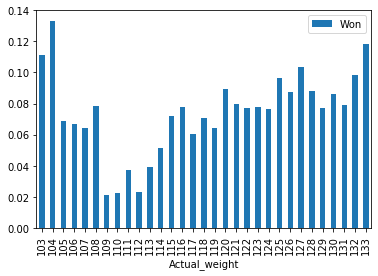

In [51]:
P=pd.DataFrame(raceruns.groupby('Actual_weight')['Won'].mean())
P.plot.bar()
plt.show()

In [45]:
gelding=raceruns.query("horse_type=='Gelding'")
mare=raceruns.query("horse_type=='Mare'")
horse=raceruns.query("horse_type=='Horse'")
brown=raceruns.query("horse_type=='Brown'")
rig=raceruns.query("horse_type=='rig'")
colt=raceruns.query("horse_type=='Colt'")
roan=raceruns.query("horse_type=='Roan'")

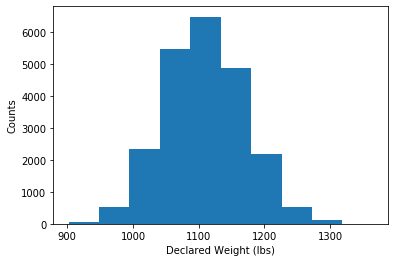

NormaltestResult(statistic=56.9399069410686, pvalue=4.3217168331487684e-13)
The variance is: 3680.6628462305125


In [23]:
import scipy.stats as sts
plt.hist(raceruns["Declared_weight"])
plt.xlabel('Declared Weight (lbs)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(raceruns["Declared_weight"]))
var=np.var(raceruns["Declared_weight"])
std=np.std(raceruns["Declared_weight"])
mean=np.mean(raceruns["Declared_weight"])
median=np.median(raceruns["Declared_weight"])
mode=sts.mode(raceruns["Declared_weight"])
print(f"The variance is: {var}")

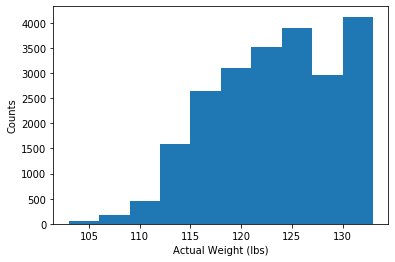

NormaltestResult(statistic=1402.8618908307797, pvalue=2.35727890579134e-305)
The variance is: 39.31338828538831


In [25]:
plt.hist(raceruns["Actual_weight"])
plt.xlabel('Actual Weight (lbs)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(raceruns["Actual_weight"]))
var=np.var(raceruns["Actual_weight"])
std=np.std(raceruns["Actual_weight"])
mean=np.mean(raceruns["Actual_weight"])
median=np.median(raceruns["Actual_weight"])
mode=sts.mode(raceruns["Actual_weight"])
print(f"The variance is: {var}")

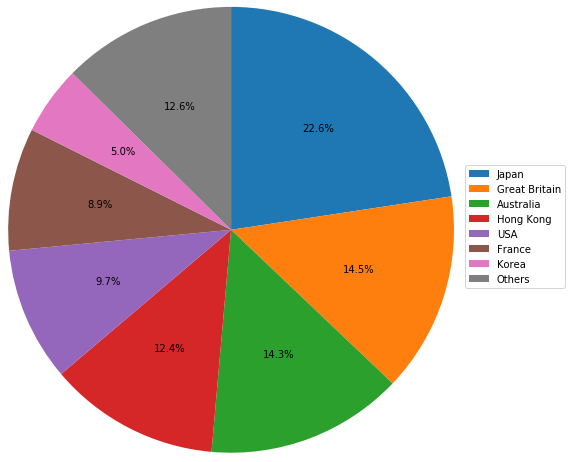

In [62]:
otros=100-(22.6+14.5+14.3+12.4+9.7+8.9+5)
donut_sizes =[22.6,14.5,14.3,12.4,9.7,8.9,5,otros]
labels=["Japan","Great Britain","Australia","Hong Kong","USA","France","Korea","Others"]
pie=plt.pie(donut_sizes, startangle=90,autopct="%1.1f%%",radius=3,counterclock=False)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.43)

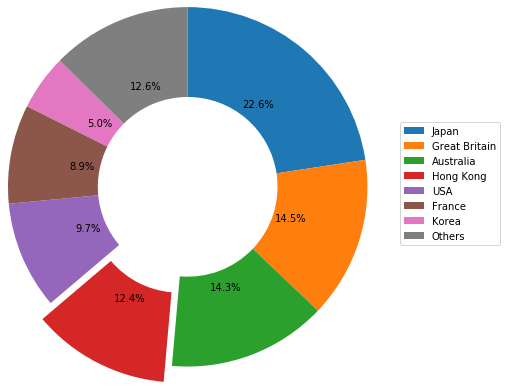

In [99]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
data = [22.6,14.5,14.3,12.4,9.7,8.9,5,otros]
explode = (0, 0 , 0, 0.2,0,0,0,0)
pie = ax.pie(data, wedgeprops=dict(width=1), startangle=90,autopct="%1.1f%%",radius=2,counterclock=False,explode=explode)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.53)
plt.savefig("DonutCountry.png")
plt.show()

In [ ]:
#Jorge work

In [ ]:
#Mario work

In [ ]:
#Sergio work